<a href="https://www.kaggle.com/code/ricktenbult/concrete-strength-prediction?scriptVersionId=133897258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Context
Concrete is one of the most important materials in civil engineering. The concrete compressive strength is a strong non-linear relationship between age and different materials. Concrete is a material with high strength in compression, but low strength in tension. Because of that, engineers use reinforced concrete to differint building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi, which corresponds to 17 MPa.  


The dataset contains 1030 instances and 9 attributes, of which 8 are quantitative input variables and 1 quantitative output variable. Furthermore, the dataset contains no missing values and is in raw form.

### Content
The feature set includes:
* Cement: quantitative input variable - kg in m3 mixture.
* Blast Furnace Slag: quantitative input variable - kg in m3 mixture.
* Fly Ash: quantitative input variable - kg in m3 mixture.
* Water: quantitative input variable - kg in m3 mixture.
* Superplasticizer: quantitative input variable - kg in m3 mixture.
* Coarse Aggregate: quantitative input variable - kg in m3 mixture.
* Fine Aggregate: quantitative input variable - kg in m3 mixture.
* Age: quantitative input variable - day (1~365).
* Strength: quantitative output variable - MPa.

In [1]:
# Import data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import feature engineering libraries 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Import performance metrics libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import regression libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/regression-with-neural-networking/concrete_data.csv")

# Create a copy of the dataset
df = data.copy()

In [3]:
# Print the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 1030 rows and 9 columns.


In [4]:
# Show the first 5 rows of the dataset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Return general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Return descriptive statistics of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
def visualizations(df: pd.DataFrame, target: str):
    """
    Function used to plot the boxplot, distribution, and interaction between X and y for each numerical column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - target (str): A target variable of a DataFrame.
    """
    
    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(df.columns), ncols=3, figsize=(12, 6 * len(df.columns)))
    fig.tight_layout(pad=2.0)

    # Select the numerical columns
    numerical_columns = df.select_dtypes(exclude=["object"]).columns.tolist()      

    for index, column in enumerate(numerical_columns):
        # Plot boxplot
        sns.boxplot(data=df[column], ax=axes[index, 0])
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot distribution
        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1])
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")

        # Plot interaction between X and y
        sns.scatterplot(data=df, x=column, y=target, ax=axes[index, 2])
        axes[index, 2].set_title(f"Scatterplot of {column} versus {target}")
        axes[index, 2].set_xlabel("")

    # Show the plot
    plt.show()

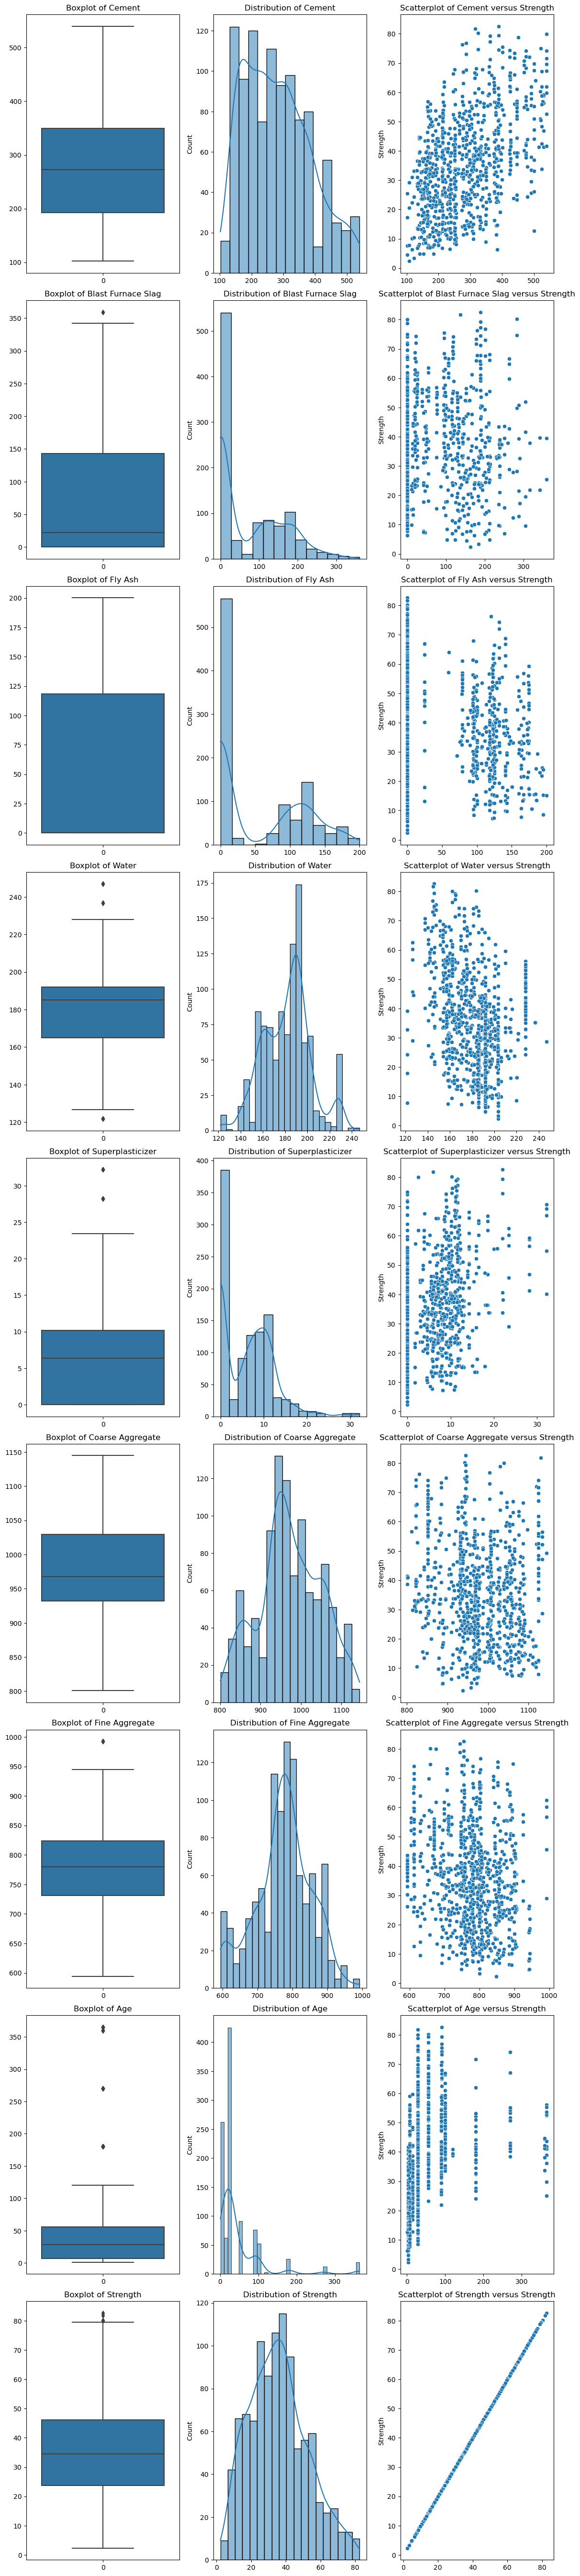

In [8]:
# Apply the visualizations function
visualizations(df, target="Strength")

In [9]:
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    """
    Function used to replace outliers in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - inner_fence_multiplier (float): A multiplier to determine the inner fence. Default is 1.5.
        - outer_fence_multiplier (float): A multiplier to determine the outer fence. Default is 3.0.

    Returns:
        - df (pd.DataFrame): A DataFrame with outliers replaced by the mean value.
    """

    # Select the numerical columns
    numerical_columns = df.select_dtypes(exclude=["object"]).columns.tolist() 

    for column in numerical_columns:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()


    return df

In [10]:
# Apply the replace_outliers function to the dataset
df = replace_outliers(df)

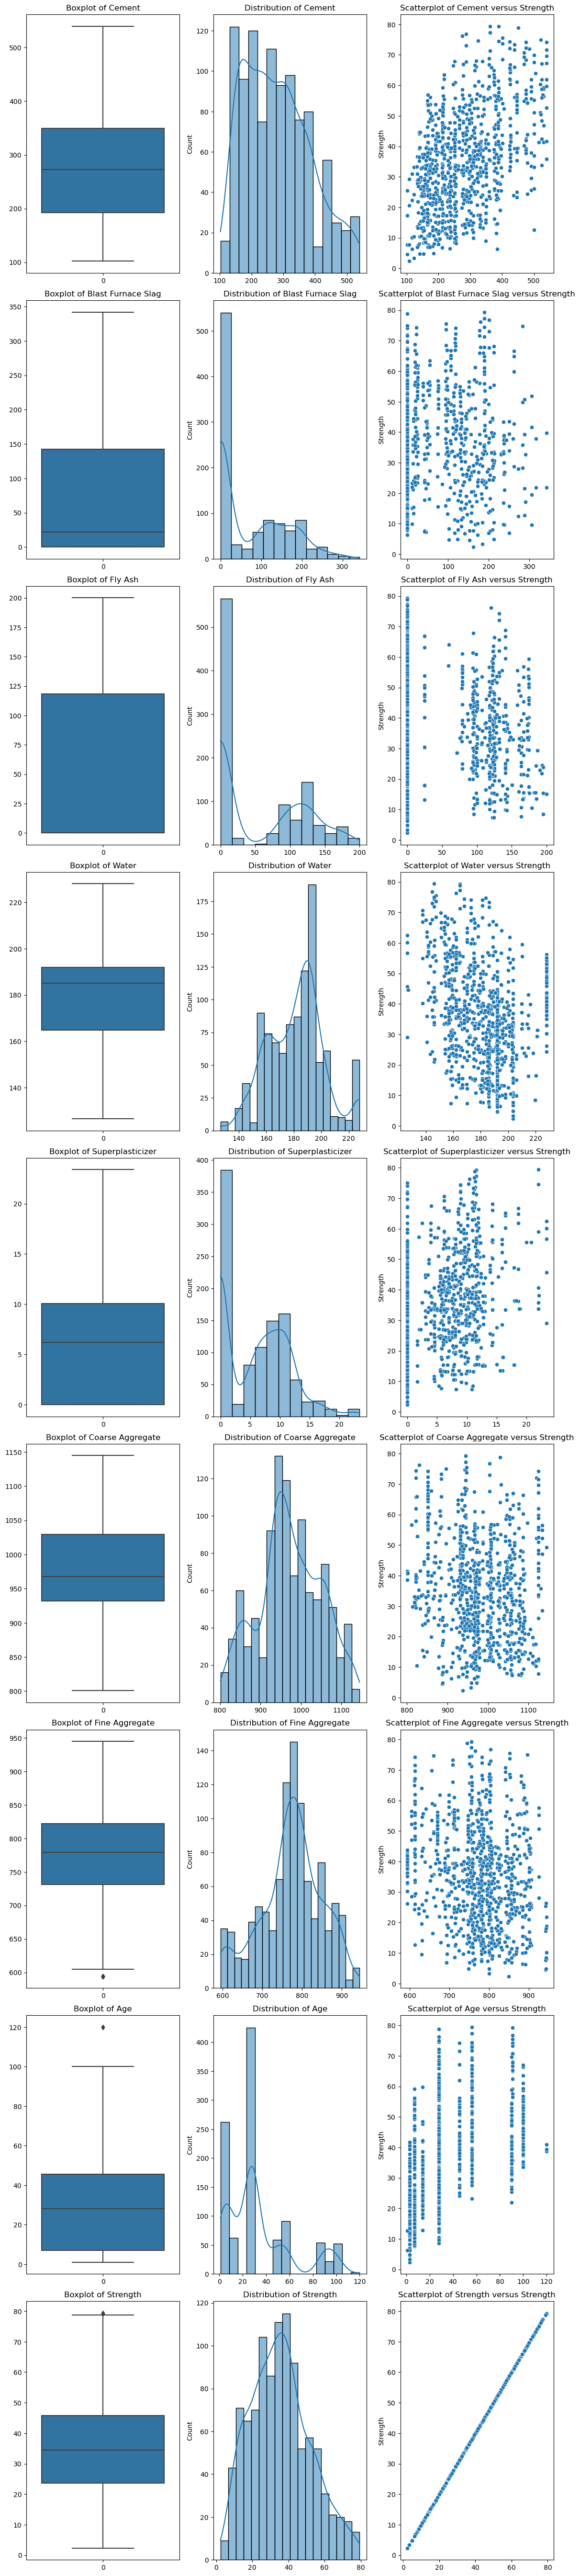

In [11]:
# Re-apply the visualizations function after dealing with outliers
visualizations(df, target="Strength")

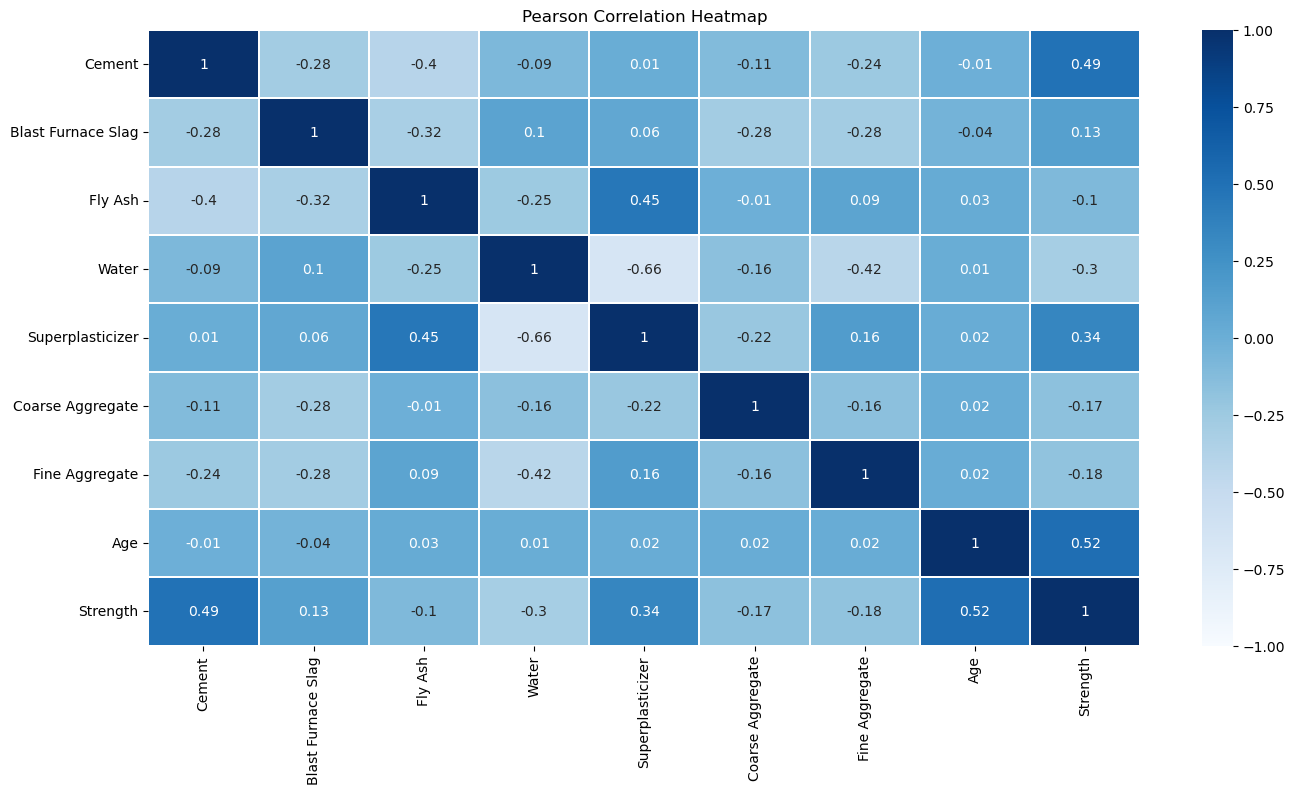

In [12]:
# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the correlation between the features
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.2, fmt=".2g", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")

# Show the plot
plt.show()

In [13]:
# Split the dataset into X and y, representing the features and the target variable
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [14]:
# Prespecify the random state
RANDOM_STATE = 2

# Perform a train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Return the size of X_train and X_test
print(f"Size of training data: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"Size of testing data: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

Size of training data: 721 rows and 8 columns.
Size of testing data: 309 rows and 8 columns.


In [15]:
# Define the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [16]:
# Define the base models to be trained and evaluated
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(random_state=RANDOM_STATE),
    "XGBRegressor": XGBRegressor(random_state=RANDOM_STATE),
    "SVR": SVR(kernel="linear"),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "BaggingRegressor": BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=RANDOM_STATE),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=RANDOM_STATE),
}

In [17]:
def train_and_evaluate_models(models: dict) -> pd.DataFrame:
    """
    Function used to fit, predict, and evaluate different models.

    Parameters:
        - models (dict): A dictionary of model names and model objects.

    Returns:
        - base_results (pd.DataFrame): A DataFrame containing the performance for each base model.
    """
    
    # Initialize the base results DataFrame
    base_results = pd.DataFrame(columns=["R-Squared", "RMSE", "MAE"])

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train_scaled, y_train)

        # Predict the target variable
        y_pred = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        r2 = round(r2_score(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)

        # Store the results in the DataFrame
        base_results.loc[model_name] = [r2, rmse, mae]
        
    # Sort the results in descending order for R-Squared
    base_results = base_results.sort_values(by="R-Squared", ascending=False)


    return base_results

In [18]:
# Apply the train_and_evaluate_models function
base_results = train_and_evaluate_models(base_models)

In [19]:
# Show the results of the trained and evaluated base models
base_results

,R-Squared,RMSE,MAE
XGBRegressor,0.922,4.563,2.960
Random Forest Regressor,0.911,4.862,3.603
GradientBoostingRegressor,0.890,5.419,4.061
BaggingRegressor,0.882,5.600,3.972
Decision Tree Regressor,0.852,6.283,4.229
Linear Regression,0.737,8.364,6.592
Ridge Regression,0.735,8.395,6.633
SVR,0.710,8.788,6.993


In [20]:
def tune_and_evaluate_models(gridsearch_model: dict, param_grid: dict) -> pd.DataFrame:
    """
    Function used to tune the hyperparameters of selected models and evaluate the tuned models.

    Parameters:
        - gridsearch_model (dict): A dictionary of model names and model objects.
        - param_grid (dict): A dictionary of model names and parameter grids for hyperparameter tuning.

    Returns:
        - tuned_model: A model containing the tuned hyperparameters.
        - tuned_results (pd.DataFrame): A DataFrame containing the performance for each model, including the tuned and base models.
    """

    for model_name, model in gridsearch_model.items():
        if model_name in param_grid:
            param_grid = param_grid[model_name]

            # Perform hyperparameter tuning using GridSearchCV
            model_gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="r2")
            model_gridsearch.fit(X_train, y_train)

            # Get the tuned model with the best estimators
            tuned_model = model_gridsearch.best_estimator_
            
            # Add the tuned models to the base_models dictionary
            base_models[f"Tuned {model_name}"] = tuned_model

    # Re-apply the train_and_evaluate_models function with both the base models and the tuned model
    tuned_results = train_and_evaluate_models(base_models)


    return tuned_model, tuned_results

In [21]:
# Define the model to be tuned
gridsearch_model = {"XGBRegressor": XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1)}

# Define the parameter grid
param_grid = {
    "XGBRegressor": {
        "n_estimators": [3000, 2750, 2500],
        "max_depth": [8, 6, 4],
        "learning_rate": [0.075, 0.050, 0.025]
    }
}

In [22]:
# Apply the tune_and_evaluate function
tuned_model, tuned_results = tune_and_evaluate_models(gridsearch_model, param_grid)

In [23]:
# Show the hyperparameters of the tuned model
tuned_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.025, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

In [24]:
# Show the results of the tuned and evaluated models
tuned_results

,R-Squared,RMSE,MAE
Tuned XGBRegressor,0.938,4.049,2.703
XGBRegressor,0.922,4.563,2.960
Random Forest Regressor,0.911,4.862,3.603
GradientBoostingRegressor,0.890,5.419,4.061
BaggingRegressor,0.882,5.600,3.972
Decision Tree Regressor,0.852,6.283,4.229
Linear Regression,0.737,8.364,6.592
Ridge Regression,0.735,8.395,6.633
SVR,0.710,8.788,6.993
